### Data Analization

#### Importing required libraries

In [350]:
import numpy as np
import pandas as pd
import os
import seaborn as sns; sns.set(style="ticks",color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

#### Understanding the data

In [381]:
#read the data from DataCoSupplyChainDataset.csv into a dataframe df 
df=pd.read_csv('D:/Rajesh/Rajesh/Personal/AISanDiego/501-Introduction to AI/Project/Data/DataCoSupplyChainDataset.csv', 
               encoding='latin1')

# Checking the number of columns and rows
df.shape



(180519, 53)

In [314]:
# Show the glimps of dataset
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 55)
pd.set_option('display.width', 300)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [315]:
# Identifying data types of each feature
data_types = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [382]:
# Drop the 'Sales' column as it is the Dependent variable 
data = df.drop(columns=['Sales'])

#### Check Binary, Qualitative and Other Features 

In [353]:

# List of columns in the dataset
columns = data.columns.tolist()

# Identify binary features
binary_columns = [col for col in columns if data[col].nunique() == 2]

print("Binary Features:")
print(binary_columns)
print("\nNumber of Binary Features:", len(binary_columns))


# Identify non-binary features
non_binary_features = [col for col in data.columns if col not in binary_columns]

# Check the data types of each column
data_types = data.dtypes

# Identify qualitative features based on data type (object type in pandas usually indicates strings/characters)
qualitative_features = data_types[data_types == 'object'].index.tolist()

print("\nQualitative Features:")
print(qualitative_features)
print("\nNumber of Qualitative Features:", len(qualitative_features))


# Identify other non-binary features which are not character/quality features
non_binary_columns = [col for col in non_binary_features if col not in qualitative_features]

print("\nOther Non-Binary Features:")
print(non_binary_columns )
print("\nNumber of Other Features:", len(non_binary_columns ))

Binary Features:
['Late_delivery_risk', 'Customer Country']

Number of Binary Features: 2

Qualitative Features:
['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Image', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode']

Number of Qualitative Features: 24

Other Non-Binary Features:
['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quan

### Data Cleaning

#### Find missing values

In [354]:
#  Find missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0] # columns with no missing values are removed

# Print results
if len(missing_values)>0:
    print("Missing Values:", missing_values,"\n")
else:
    print('No Missing Value\n')

Missing Values: Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64 



Features above are not significant for model and will not be taken into the model. Hence there is no action required

#### Check duplicate rows

In [355]:
# Check duplicate rows
duplicate_rows = df[df.duplicated()]  #df is used to check duplicate rows to consider the sales during duplicate checking

# Print duplicate rows details
if len(duplicate_rows>0):
    print("Number of Duplicate Rows:",len(duplicate_rows))
    print('\n')

else:
    print("No Duplicate data\n")

print("\n")    

No Duplicate data





#### Checking for exact duplicate columns and highly corelated columns

In [356]:
# Function to find exact duplicate columns
def find_exact_duplicates(df):
    """Find columns with exactly the same data."""
    duplicates = {}
    columns = data.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if data[columns[i]].equals(data[columns[j]]):
                if columns[i] in duplicates:
                    duplicates[columns[i]].append(columns[j])
                else:
                    duplicates[columns[i]] = [columns[j]]
    return duplicates

# Function to find highly correlated columns
def find_highly_correlated(data, threshold=0.95):
    """Find columns that are highly correlated along with their correlation values, only for numeric data."""
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    # Calculate correlation matrix
    corr_matrix = numeric_data.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # List to hold pairs of highly correlated columns
    correlated_pairs = []
    for i in range(len(upper.columns)):
        for j in range(i + 1, len(upper.columns)):
            if upper.iloc[i, j] > threshold:
                col1 = upper.columns[i]
                col2 = upper.columns[j]
                correlation_value = upper.iloc[i, j]
                correlated_pairs.append((col1, col2, correlation_value))
    return correlated_pairs

# Find exact duplicates
exact_duplicates = find_exact_duplicates(df)
print("Exact duplicate columns:")
for key, values in exact_duplicates.items():
    print(f"{key}: {values}")

# Find highly correlated columns
highly_correlated_columns = find_highly_correlated(df)
print("\nHighly correlated columns (threshold > 0.95) with correlation values:")
for col1, col2, corr_value in highly_correlated_columns:
    print(f"{col1} and {col2} with correlation {corr_value:.2f}")

# Combine both results for a final list of columns to consider dropping
columns_to_consider_dropping = set([col2 for col1, col2, _ in highly_correlated_columns])
for key, values in exact_duplicates.items():
    columns_to_consider_dropping.update(values)

print("\nColumns to consider dropping:")
print(columns_to_consider_dropping)


Exact duplicate columns:
Benefit per order: ['Order Profit Per Order']
Sales per customer: ['Order Item Total']
Category Id: ['Product Category Id']
Customer Email: ['Customer Password']
Customer Id: ['Order Customer Id']
Order Item Cardprod Id: ['Product Card Id']
Order Item Product Price: ['Product Price']

Highly correlated columns (threshold > 0.95) with correlation values:
Benefit per order and Order Profit Per Order with correlation 1.00
Sales per customer and Sales with correlation 0.99
Sales per customer and Order Item Total with correlation 1.00
Category Id and Order Item Cardprod Id with correlation 0.99
Category Id and Product Card Id with correlation 0.99
Category Id and Product Category Id with correlation 1.00
Customer Id and Order Customer Id with correlation 1.00
Order Id and Order Item Id with correlation 1.00
Order Item Cardprod Id and Product Card Id with correlation 1.00
Order Item Cardprod Id and Product Category Id with correlation 0.99
Order Item Product Price an

#### Check for constant features

In [357]:
# Check for constant features (features with zero variance)
constant_features = [col for col in data.columns if data[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: ['Customer Email', 'Customer Password', 'Product Status']


#### Removal of duplicate, highly corelated, constant and unrelated features from the dataset based on application of domain knowledge

In [383]:
Feature_List = ['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Segment', 
          'Customer State', 'Department Name', 
          'Market', 'Order City', 'Order Country', 'order date (DateOrders)',  
          'Order Item Discount', 'Order Item Discount Rate', 
           'Order Item Profit Ratio', 'Order Item Quantity',   
           'Order Region', 'Order State', 'Order Status', 
          'Product Category Id', 'Product Name', 'Product Price', 
       'shipping date (DateOrders)', 'Shipping Mode']
df_relevant_features=df[Feature_List]

#Inpecting the data with relevant features
df_relevant_features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,0.29,1,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,-0.80,1,South Asia,Rajastán,PENDING,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,-0.80,1,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,0.08,1,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,0.45,1,Oceania,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


#### Check for Nan Values in Features

In [384]:

# Check for NaN values 
nan_counts = df_relevant_features.isnull().sum()
print("NaN counts per column:\n", nan_counts[nan_counts > 0])

NaN counts per column:
 Series([], dtype: int64)


#### Check for Features with Negative Values

In [385]:
# Select only numeric columns
numeric_df = df_relevant_features.select_dtypes(include=['number'])

# Identify columns with negative values and count the number of negative values in each column
negative_counts = numeric_df.apply(lambda x: (x < 0).sum())

# Filter to show only columns with negative values
negative_columns = negative_counts[negative_counts > 0]

print(negative_columns)


Benefit per order          33784
Order Item Profit Ratio    33784
dtype: int64


These values are significant and can not be deleted just like that

#### Again get the binary, qualitative and non binary features based on the relevant features

In [386]:

# List of columns in the dataset
columns = df_relevant_features.columns.tolist()

# Identify binary features
binary_columns = [col for col in columns if df_relevant_features[col].nunique() == 2]

print("Binary Features:")
print(binary_columns)
print("\nNumber of Binary Features:", len(binary_columns))


# Identify non-binary features
non_binary_features = [col for col in df_relevant_features.columns if col not in binary_columns]

# Check the data types of each column
data_types = df_relevant_features.dtypes

# Identify qualitative features based on data type (object type in pandas usually indicates strings/characters)
qualitative_features = data_types[data_types == 'object'].index.tolist()

print("\nQualitative Features:")
print(qualitative_features)
print("\nNumber of Qualitative Features:", len(qualitative_features))


# Identify other non-binary features which are not character/quality features
non_binary_columns = [col for col in non_binary_features if col not in qualitative_features]

print("\nOther Non-Binary Features:")
print(non_binary_columns )
print("\nNumber of Other Features:", len(non_binary_columns ))

Binary Features:
['Late_delivery_risk', 'Customer Country']

Number of Binary Features: 2

Qualitative Features:
['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode']

Number of Qualitative Features: 18

Other Non-Binary Features:
['Benefit per order', 'Sales per customer', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Item Quantity', 'Product Category Id', 'Product Price']

Number of Other Features: 8


#### Check Outliers in Non-binary Features through Quantile

In [387]:
# Task 3: Check outliers in non-binary columns through Quantile 
outliers_quantile = {}

for col in non_binary_columns:
    # Calculate IQR
    Q1 = df_relevant_features[col].quantile(0.25)
    Q3 = df_relevant_features[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Find outliers
    outlier_indices_quantile = df_relevant_features[(df_relevant_features[col] < (Q1 - 1.5 * IQR)) | (df_relevant_features[col] > (Q3 + 1.5 * IQR))].index
    if len(outlier_indices_quantile) > 0:
        outliers_quantile[col] = outlier_indices_quantile

# Display the results
features_with_outliers = {col: len(indices) for col, indices in outliers_quantile.items()}
print("\nFeatures with Outliers (as per quantile):", features_with_outliers)



Features with Outliers (as per quantile): {'Benefit per order': 18942, 'Sales per customer': 1943, 'Order Item Discount': 7537, 'Order Item Profit Ratio': 17300, 'Product Price': 2048}


#### Checking outliers through z-score

In [388]:
# Calculate Z-scores and identify outliers
outliers_z_score = {}

for col in non_binary_columns:
    z_scores = (df_relevant_features[col] - df_relevant_features[col].mean()) / df_relevant_features[col].std()
    outlier_indices = df_relevant_features[np.abs(z_scores) > 3].index
    if len(outlier_indices) > 0:
        outliers_z_score[col] = outlier_indices

# Display the results
outliers_z_score_summary = {col: len(indices) for col, indices in outliers_z_score.items()}
print("\nFeatures with Outliers (as per z_score):",outliers_z_score_summary,'\n')



Features with Outliers (as per z_score): {'Benefit per order': 3608, 'Sales per customer': 477, 'Order Item Discount': 2106, 'Order Item Profit Ratio': 6013, 'Product Price': 488} 



#### Combined Features Suspected of Having Outliers

In [389]:
# Combine keys from both dictionaries and remove duplicates
outliers_all = list(set(outliers_quantile.keys()).union(set(outliers_z_score.keys())))

# Print the final list of unique keys
print("All possible features with outliers:", outliers_all,"\n")



All possible features with outliers: ['Order Item Profit Ratio', 'Product Price', 'Benefit per order', 'Sales per customer', 'Order Item Discount'] 



#### Plotting Features with Outliers

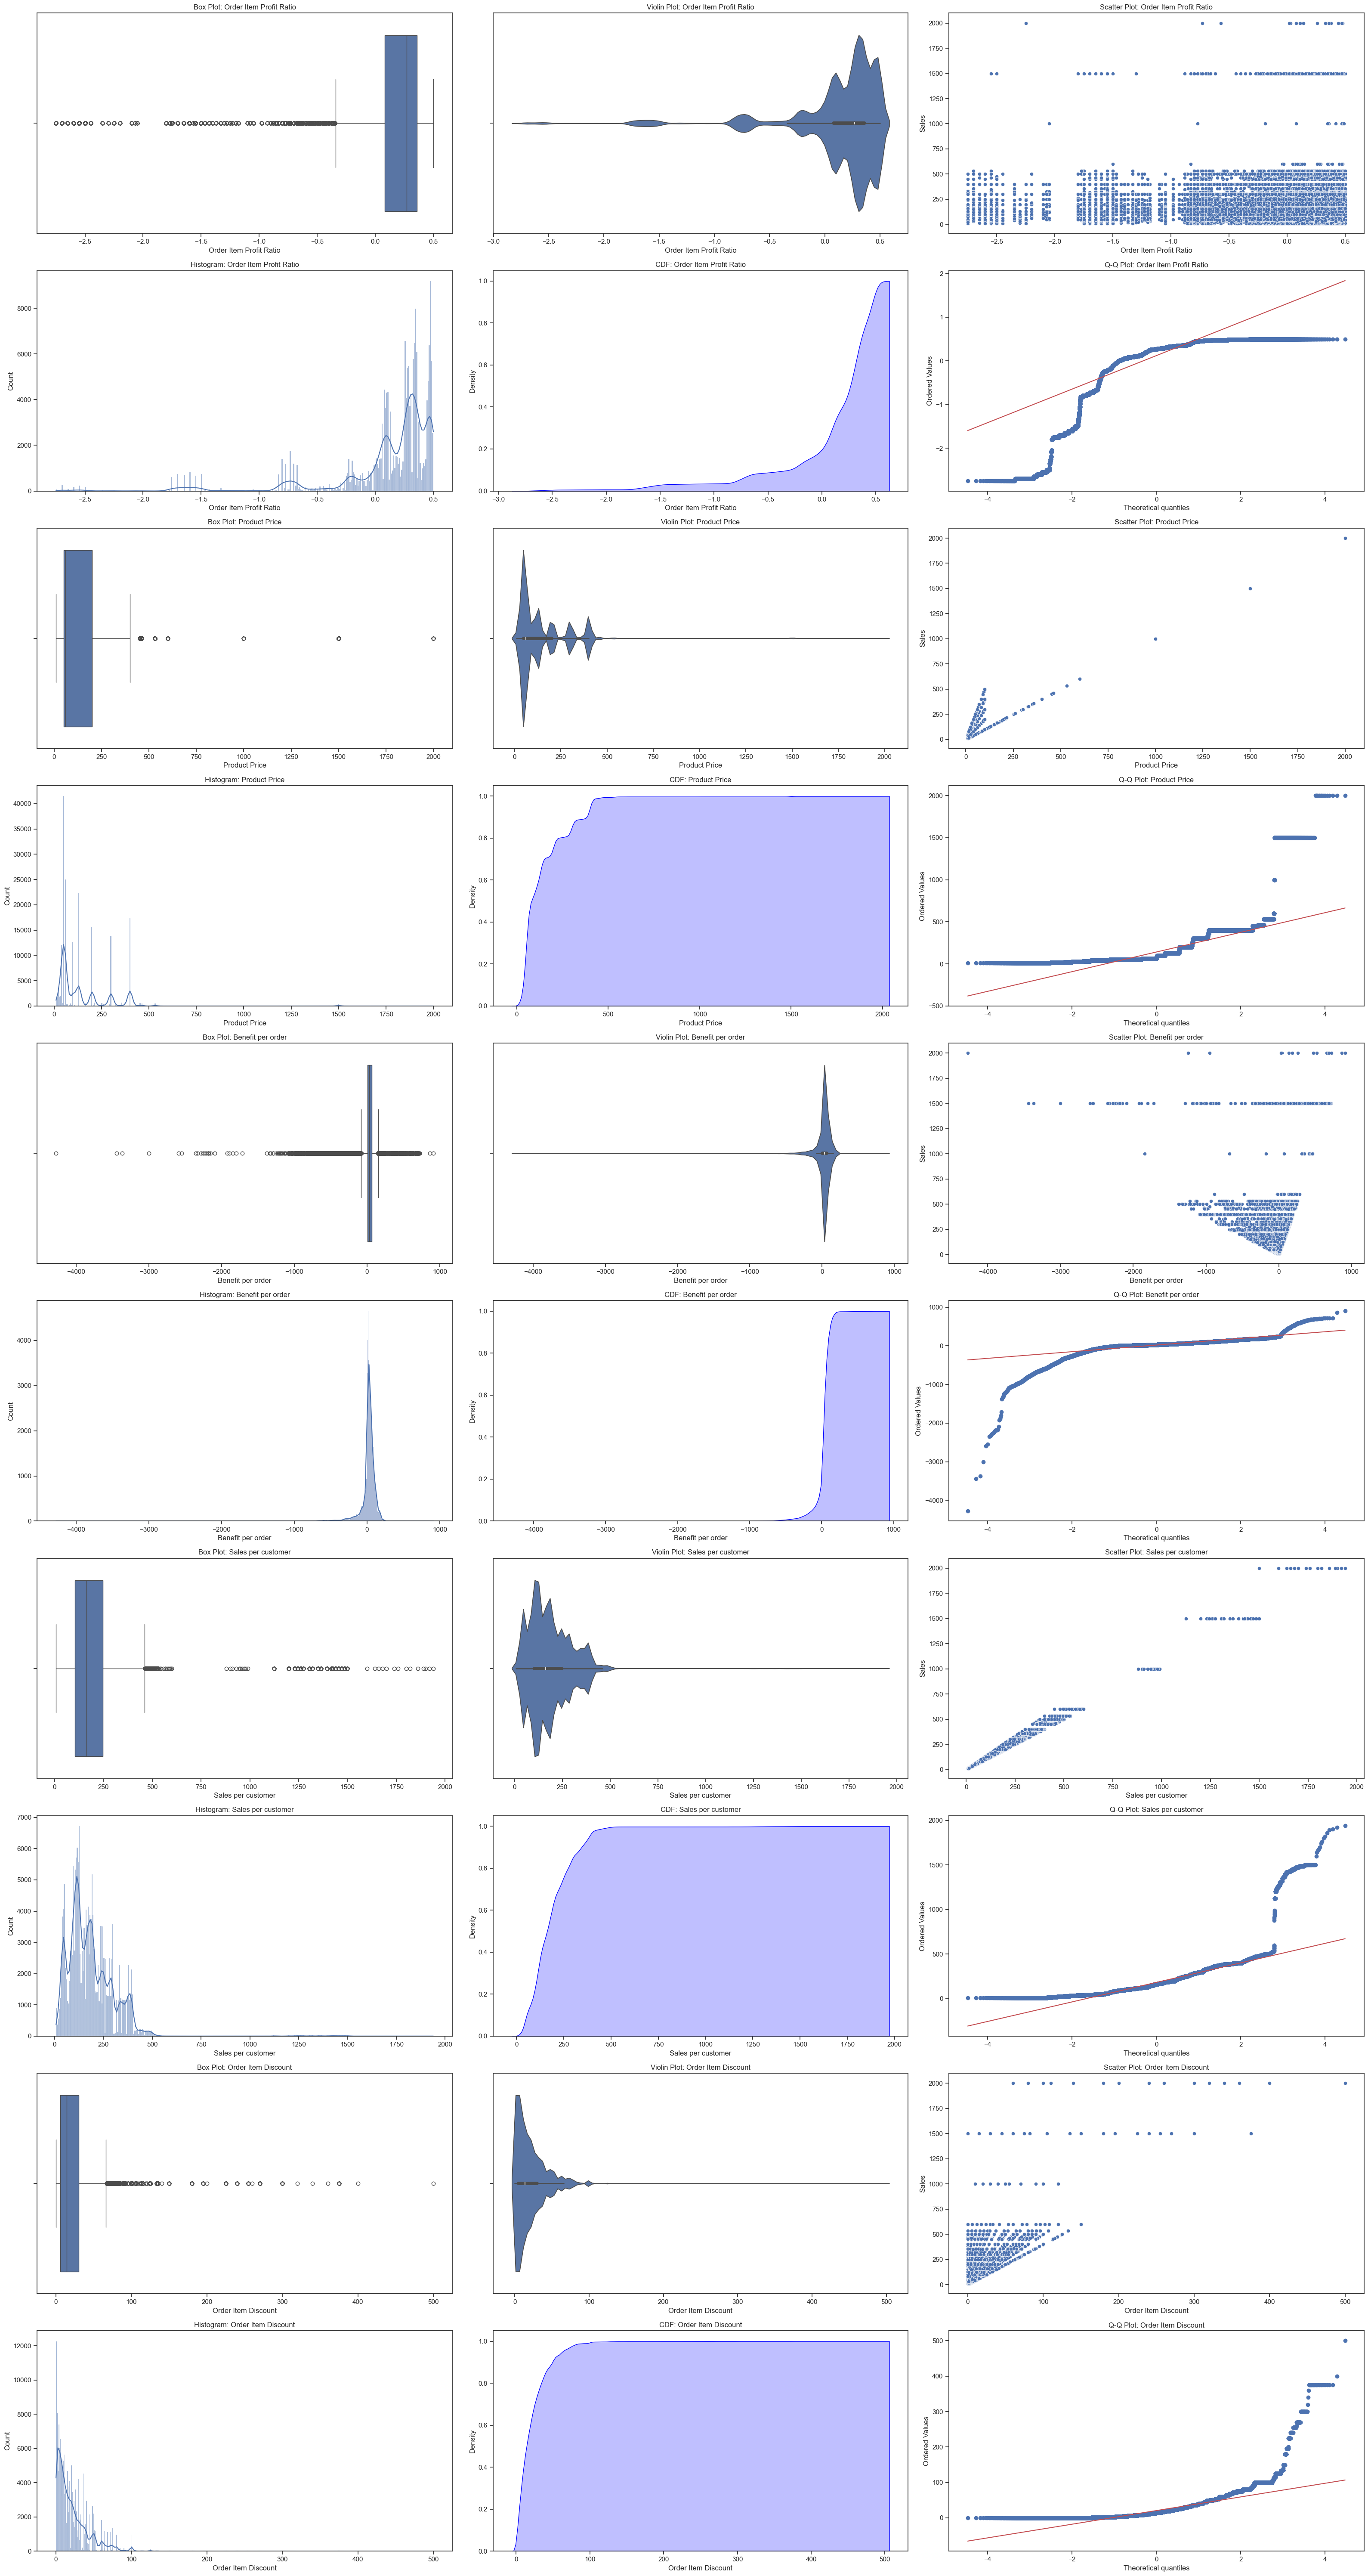

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


# Setting up the figure with 2 rows for each feature (one for the first three plots, one for the last three)
num_rows = len(outliers_all) * 2

fig, axes = plt.subplots(num_rows, 3, figsize=(32, num_rows * 6))
axes = axes.reshape(num_rows, 3)  # Ensure the axes array is 2D

for i, feature in enumerate(outliers_all):
    # Calculate the row index for plots (i*2 because each feature uses two rows)
    row = i * 2
    
    # Box Plot
    sns.boxplot(data=df_relevant_features, x=feature, ax=axes[row, 0])
    axes[row, 0].set_title(f'Box Plot: {feature}')
    
    # Violin Plot
    sns.violinplot(data=df_relevant_features, x=feature, ax=axes[row, 1])
    axes[row, 1].set_title(f'Violin Plot: {feature}')
    
    # Scatter Plot
    sns.scatterplot(data=df, x=feature, y='Sales', ax=axes[row, 2])
    axes[row, 2].set_title(f'Scatter Plot: {feature}')
    
    # Histogram
    sns.histplot(df_relevant_features[feature], kde=True, ax=axes[row + 1, 0])
    axes[row + 1, 0].set_title(f'Histogram: {feature}')

    # CDF
    sns.kdeplot(df_relevant_features[feature], cumulative=True, fill=True, color='blue', ax=axes[row + 1, 1])
    axes[row + 1, 1].set_title(f'CDF: {feature}')

    # Q-Q Plot
    stats.probplot(df_relevant_features[feature], dist="norm", plot=axes[row + 1, 2])
    axes[row + 1, 2].set_title(f'Q-Q Plot: {feature}')

# Adjust layout to prevent plot overlap
plt.tight_layout()
plt.show()


#### Analysis of outliers through visual inspection

1) Benefits per order: 

    "Benefit per Order" contains significant outliers, with both extremely high and low values, which could represent theoritically exceptional cases or data errors. The Q-Q plot deviates substantially from the line at both ends, confirming non-normality.  These outliers represent a valid but rare business scenario.

    These outliers will have a strong impact on mean calculations and any models that assume normality. They could also influence regression outcomes if not addressed.

    Hence the performance of the chosen model will become very important.

2) Product Price

    The "Product Price" data exhibits a non-uniform distribution with multiple modes, suggesting segmentation within the product offerings. The presence of outliers, particularly on the higher end, indicates that while most products are moderately priced, a small selection of products are significantly more expensive. These could represent specialty or luxury items.

    Any predictive modeling should consider the skewed and multimodal nature of the data. Non-linear models or segmented approaches might be more appropriate than assuming a normal distribution of prices.

3) Sales per Customer

    "Sales per Customer" data is highly skewed with a significant number of outliers on the high end, which could have implications for how sales strategies are developed and targeted. These outliers might represent key opportunities or risks for the business, depending on the nature of these high-value sales. Understanding the characteristics of customers who generate these higher sales could provide insights into customer behavior, preferences, or product appeal.

    For predictive modeling or statistical analysis, consider techniques to manage outliers, such as transformations (e.g., logarithmic) to reduce skewness or using models that are robust to outliers.

4) Order Item Discount

    "Order Item Discount" shows a predominant occurrence of smaller discounts with occasional large outliers. These outliers may need further investigation to determine if they are due to special promotions, specific customer dealings, or data errors.

    For analyses involving this variable, consider transformations or non-parametric methods that can handle the skew and outliers effectively. Also, robust statistical measures like the median or modal discount might provide better insights than the mean in this skewed distribution.

5) Order Item Profit Ratio

    The "Order Item Profit Ratio" exhibits complex dynamics with a broad spread of values, indicating that different items or orders contribute unevenly to profitability. The presence of outliers and the broad distribution suggest a diverse business model where some items are significantly more or less profitable than others.

    Given the skewness and outliers, using median or mode-based measures for central tendency and variability could be more informative than means.

    Breaking down the profit ratio by product categories, customer segments, or sales channels may reveal underlying patterns that are obscured when looking at aggregated data.

#### Further Analysis of Outliers using Corelation

In [390]:
#For corelation add target variable 'Sales' to outliers_all 

outliers_all.append('Sales')

# Subsetting df to include only the columns with outliers plus 'Sales'
outliers_df = df[outliers_all]

# Calculate the correlation matrix
correlation_matrix_outliers = outliers_df.corr()

# Print the correlation matrix
print(correlation_matrix_outliers)

                         Order Item Profit Ratio  Product Price  Benefit per order  Sales per customer  Order Item Discount     Sales
Order Item Profit Ratio                 1.000000      -0.002043           0.823689           -0.001439            -0.002788 -0.001766
Product Price                          -0.002043       1.000000           0.103459            0.781781             0.488101  0.789948
Benefit per order                       0.823689       0.103459           1.000000            0.133484             0.064756  0.131816
Sales per customer                     -0.001439       0.781781           0.133484            1.000000             0.498734  0.989744
Order Item Discount                    -0.002788       0.488101           0.064756            0.498734             1.000000  0.617438
Sales                                  -0.001766       0.789948           0.131816            0.989744             0.617438  1.000000


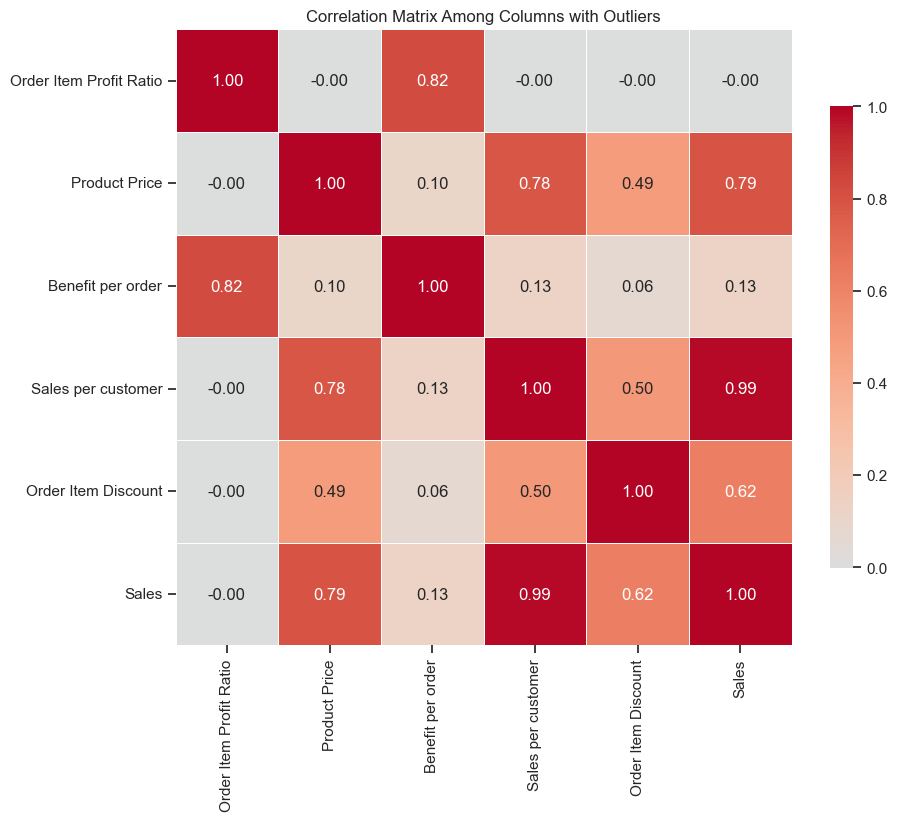

In [400]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_outliers, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix Among Columns with Outliers')
plt.show()


#### Interpretation of Key Correlations in non binary columns
 - High Correlations with Sales:

    Sales per customer shows a very high correlation of 0.99 with Sales. So sales per customer is a critical driver of overall sales, suggesting that strategies aimed at increasing sales per transaction could effectively boost total sales.

    Product Price is also highly corelated with Sales (0.79) indicating  that higher-priced items significantly contribute to total sales, suggesting that managing pricing strategies could have a substantial impact on sales performance.

    Order Item Discount is also highly correlated with Sales (0.62), suggesting that discounts may drive higher sales volumes, indicating that promotional activities could be an effective sales strategy.

- Low corelation with sales:

    Benefit per order: 0.13181 - Suggests some level of association but indicates that benefits per order are not a strong predictor of sales volume

    Order Item Profit Ratio: -0.001766 - Negligible correlation showing that the profit margin per item does not significantly impact the total sales volume

- Relationships between Features:

    a) Benefit per order and Other Variables:

    Order Item Profit Ratio : 0.823689. Indicates strong positive correlation. This relationship implies a linear dependency which can be crucial in predictive modeling.

    Sales per customer: 0.133484. A modest correlation suggests a weak positive relationship, indicating that benefits per order slightly increase with sales per customer but might not be strong enough to warrant direct modeling without considering other variables.

    Product Price: 0.103459. Weak positive correlation, which means higher product prices might slightly increase the benefits per order. This can be included in model considerations but with cautious interpretation due to its weak strength.

    b) Product Price:

    Sales per customer: 0.781781. A strong correlation implies that as product prices increase, the sales per customer also tend to increase, which can be vital for revenue prediction models.

    Order Item Discount: 0.488101. A moderate correlation indicates that higher-priced products tend to have higher discounts. This could be useful for promotional strategy models and customer segmentation
    
    c) Sales per customer and Order Item Discount: 0.498734. Indicates a moderate relationship where higher sales per customer are associated with higher discounts. This can be an essential factor in sales promotion analysis and customer segmentation.

#### Data Preparation Insights

- Linear Models (LinearRegression, Lasso, Ridge, SGD Regressor)

1. Benefit per Order

    Transformation: Apply logarithmic transformations to mitigate the effect of extreme outliers.

    Dimensionality Reduction: Consider PCA if combining with Order Item Profit Ratio to avoid multicollinearity.

2. Product Price

    Normalization/Standardization: Standardize to manage scale differences.

3. Sales per Customer

    Transformation: Use logarithmic transformations to reduce skewness and stabilize variance.

4. Order Item Discount

    Robust Scaling: Utilize RobustScaler to reduce the impact of extreme values.

5. Order Item Profit Ratio

    Transformation: Apply logarithmic transformations, especially if used in conjunction with Benefit per Order.

- Tree-Based Models (Random Forest, XG Boost, Decision Tree Regressor)

1. Benefit per Order

    Direct Use: Can handle raw values but consider feature engineering to capture interactions with other variables if necessary.

2. Product Price

    Direct Use: No need for scaling; consider binning if there are natural groupings that impact target predictions.

3. Sales per Customer

    Direct Use: Handle raw values; tree-based models can deal with outliers effectively.

4. Order Item Discount

    Direct Use: Similar to sales per customer, no need for transformations.

5. Order Item Profit Ratio

    Direct Use: Handle raw values but watch for the influence of extreme outliers.

- Time Series Models (ARIMA, Seasonal ARIMA, Prophet, LSTM)

1. Benefit per Order

    Handling: Typically not used unless it shows a clear time-dependent trend.

2. Product Price

    Standardization: If used as an exogenous variable, ensure it is standardized and stationary.

3. Sales per Customer

    Differencing/Transformation: Ensure stationarity through differencing and use transformations like logarithmic to stabilize variance.

4. Order Item Discount

    Handling: Might not be directly used unless there is a clear temporal pattern affecting sales.

5. Order Item Profit Ratio

    Handling: Not typically used unless analyzing profitability trends over time.

- Summary and General Recommendations

    Transformation for Skewness and Outliers: Logarithmic transformations are recommended across model types for highly skewed distributions (e.g., Sales per Customer, Benefit per Order).

    Standardization and Normalization: Primarily important for linear models, especially when features vary widely in scales (e.g., Product Price).

    Direct Use in Non-Linear Models: Tree-based models handle outliers and non-linear relationships well, so raw values can often be used directly.

#### Preparing Data files for different types of models

In [401]:

# Initialize the DataFrames to an empty DataFrame 
df_linear_models_features = pd.DataFrame()
df_treebased_models_features = pd.DataFrame()
df_timeseries_models_features = pd.DataFrame()

# Now assign the actual DataFrames
df_linear_models_features = df_relevant_features.copy()
df_treebased_models_features = df_relevant_features.copy()
df_timeseries_models_features = df_relevant_features.copy()